Naive Bayes Algorithm

Importing the Liblaires

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

Loading the Dataset

In [4]:
dataset=pd.read_csv(r"..\Datasets\Social_Network_Ads.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

Splitting the Dataset into test set and training set

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Feature Scalling

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

Training Naive Bayes model on training set

In [7]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


Predicting New Result

In [8]:
print(model.predict([[19,19000]]))

[1]


Predicting Test set Results

In [10]:
y_pred=model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


Making Confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[54  4]
 [ 1 21]]


0.9375

Visualising the result

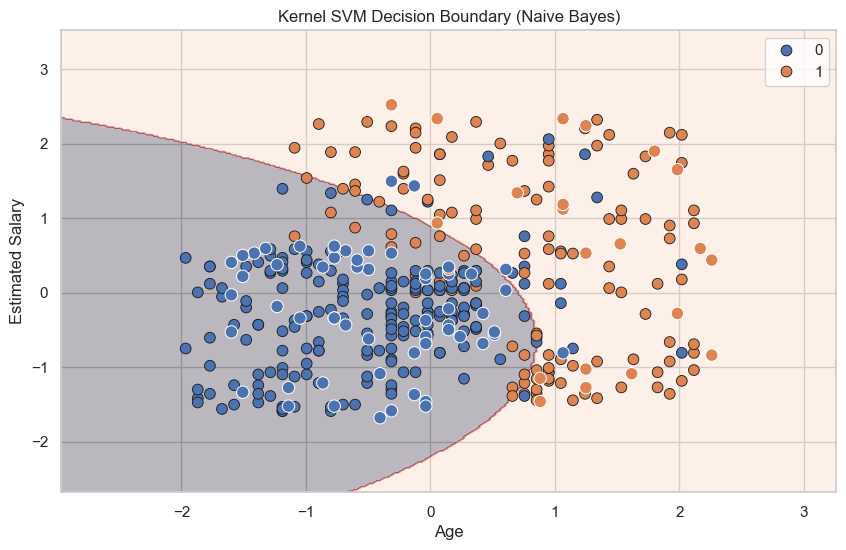

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Combine train and test for boundary plotting
X_all = np.vstack((X_train, X_test))
y_all = np.hstack((y_train, y_test))

# Create mesh grid
x_min, x_max = X_all[:, 0].min() - 1, X_all[:, 0].max() + 1
y_min, y_max = X_all[:, 1].min() - 1, X_all[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Predict over grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)

# Plot training points
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette="deep",
    edgecolor="k",
    s=60,
    legend=True
)

# Plot test points
sns.scatterplot(
    x=X_test[:, 0],
    y=X_test[:, 1],
    hue=y_test,
    palette="deep",
    markers="X",
    s=80,
    legend=False
)

plt.title("Kernel SVM Decision Boundary (Naive Bayes)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()
